# **Project Name**    - Amazon Prime EDA



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Apurba Koirala**


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/apurbaaaa/Amazon-EDA

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
# Load Dataset
titles = pd.read_csv("titles.csv")
credits = pd.read_csv("credits.csv")

### Dataset First View

In [3]:
# Dataset First Look
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [4]:
credits.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print("titles shape: ", titles.shape, " credits shape: ", credits.shape)

titles shape:  (9871, 15)  credits shape:  (124235, 5)


### Dataset Information

In [6]:
# Dataset Info
print(titles.info)

<bound method DataFrame.info of              id                            title   type  \
0       ts20945                The Three Stooges   SHOW   
1       tm19248                      The General  MOVIE   
2       tm82253      The Best Years of Our Lives  MOVIE   
3       tm83884                  His Girl Friday  MOVIE   
4       tm56584                In a Lonely Place  MOVIE   
...         ...                              ...    ...   
9866   tm510327                     Lily Is Here  MOVIE   
9867  tm1079144  Jay Nog: Something from Nothing  MOVIE   
9868   tm847725                          Chasing  MOVIE   
9869  tm1054116                         Baikunth  MOVIE   
9870   ts275838                 Waking Up Eighty   SHOW   

                                            description  release_year  \
0     The Three Stooges were an American vaudeville ...          1934   
1     During America’s Civil War, Union spies steal ...          1926   
2     It's the hope that sustains the sp

In [7]:
print(credits.info)

<bound method DataFrame.info of         person_id         id           name      character      role
0           59401    ts20945     Joe Besser            Joe     ACTOR
1           31460    ts20945     Moe Howard            Moe     ACTOR
2           31461    ts20945     Larry Fine          Larry     ACTOR
3           21174    tm19248  Buster Keaton    Johnny Gray     ACTOR
4           28713    tm19248    Marion Mack  Annabelle Lee     ACTOR
...           ...        ...            ...            ...       ...
124230    1938589  tm1054116  Sangam Shukla         Madhav     ACTOR
124231    1938565  tm1054116   Vijay Thakur  Sanjay Thakur     ACTOR
124232     728899  tm1054116  Vanya Wellens        Budhiya     ACTOR
124233    1938620  tm1054116   Vishwa Bhanu          Gissu     ACTOR
124234    1938620  tm1054116   Vishwa Bhanu            NaN  DIRECTOR

[124235 rows x 5 columns]>


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
print(titles.duplicated().sum())
print(credits.duplicated().sum()) #some duplicates exist in both csv files, duplicate preprocessing needed

3
56


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print(titles.isnull().sum(), "\n")
print(credits.isnull().sum()) #null values exist in both csv files in some columns, preprocessing to be done upon merging

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64 

person_id        0
id               0
name             0
character    16287
role             0
dtype: int64


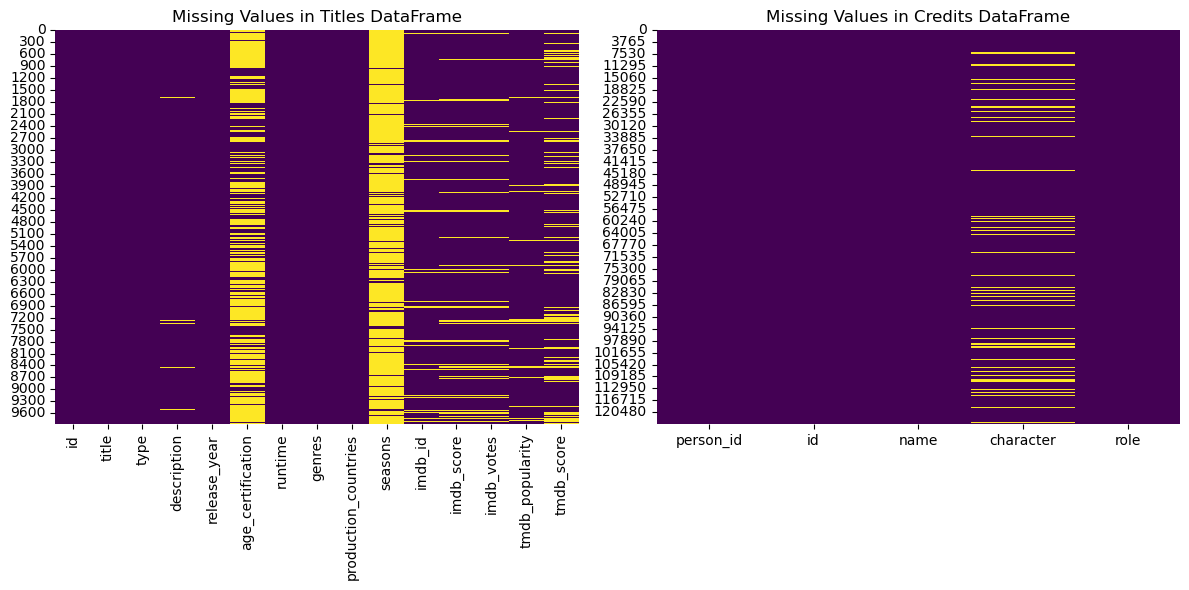

In [10]:
# Visualizing the missing values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(titles.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Titles DataFrame")

plt.subplot(1, 2, 2)
sns.heatmap(credits.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Credits DataFrame")

plt.tight_layout()
plt.show()

### What did you know about your dataset?

From the "Know Your Data" section, especially the heatmap that gives the missing values, we understand that the titles DataFrame contains a significant number of missing values in the "age_certification" and "production_countries" columns, with the "seasons" column also showing considerable gaps, likely because it applies only to TV shows and not movies. Similarly, in the credits DataFrame, missing values are primarily observed in the "character" and "role" columns, indicating incomplete metadata for some cast or crew members.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
print("titles columns: ", titles.columns, "\n\n", "credits columns: ", credits.columns)

titles columns:  Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object') 

 credits columns:  Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')


In [12]:
# Dataset Describe
titles.describe() #general description of numerical data

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.000000,9871.000000,1357.000000,8850.000000,8.840000e+03,9324.000000,7789.000000
mean,2001.327221,85.973052,2.791452,5.976395,8.533614e+03,6.910204,5.984247
std,25.810071,33.512466,4.148958,1.343842,4.592015e+04,30.004098,1.517986
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1995.500000,65.000000,1.000000,5.100000,1.170000e+02,1.232000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.625000e+02,2.536000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.236250e+03,5.634000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


In [13]:
credits.describe() #no numerical data, except person_id, id columns eventually to be dropped

,person_id
count,1.242350e+05
mean,4.064737e+05
std,5.616296e+05
min,1.000000e+00
25%,3.899200e+04
50%,1.339490e+05
75%,5.712560e+05
max,2.371153e+06


### Variables Description

## Titles DataFrame (Movies/TV Shows Information)

- **id**: Unique identifier for each movie or TV show.  
- **title**: Name of the movie or TV show.  
- **type**: Specifies whether the content is a **movie** or **TV show**.  
- **description**: Brief synopsis of the movie/show.  
- **release_year**: Year the movie or show was released.  
- **age_certification**: Age rating (e.g., PG-13, R, U/A); often missing.  
- **genres**: List of genres (e.g., Action, Drama, Comedy).  
- **production_countries**: Country/countries where the movie/show was produced.  
- **runtime**: Duration of the movie or episode (in minutes).  
- **seasons**: Number of seasons (only for TV shows; missing for movies).  
- **imdb_id**: IMDb identifier for the title.  
- **imdb_score**: IMDb rating of the title (out of 10).  
- **imdb_votes**: Number of votes received on IMDb.  
- **tmdb_popularity**: Popularity score on TMDB (The Movie Database).  
- **tmdb_score**: Rating of the title on TMDB (out of 10).  

## Credits DataFrame (Cast & Crew Information)

- **person_id**: Unique identifier for each actor or crew member.  
- **id**: Corresponding `id` from the titles DataFrame (links the cast/crew to a movie or show).  
- **name**: Name of the actor or crew member.  
- **character**: Role played by the actor (e.g., "Sherlock Holmes").  
- **role**: Job role in the production (e.g., "Actor", "Director", "Writer").  


### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
print("unique values for titles dataframe: ", titles.nunique(), "\n\n", "unique values for credits dataframe: ", credits.nunique())

unique values for titles dataframe:  id                      9868
title                   9737
type                       2
description             9734
release_year             110
age_certification         11
runtime                  207
genres                  2028
production_countries     497
seasons                   32
imdb_id                 9201
imdb_score                86
imdb_votes              3650
tmdb_popularity         5325
tmdb_score                89
dtype: int64 

 unique values for credits dataframe:  person_id    80508
id            8861
name         79758
character    71097
role             2
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
titles.drop_duplicates(inplace=True)
credits.drop_duplicates(inplace=True)

df = titles.merge(credits, on="id", how="left")

In [16]:
print(df.nunique(), "\n")
print(df.isnull().sum())

id                       9868
title                    9737
type                        2
description              9734
release_year              110
age_certification          11
runtime                   207
genres                   2028
production_countries      497
seasons                    32
imdb_id                  9201
imdb_score                 86
imdb_votes               3650
tmdb_popularity          5325
tmdb_score                 89
person_id               80508
name                    79758
character               71097
role                        2
dtype: int64 

id                           0
title                        0
type                         0
description                191
release_year                 0
age_certification        68329
runtime                      0
genres                       0
production_countries         0
seasons                 116685
imdb_id                   5376
imdb_score                6367
imdb_votes                6397
tmdb_popular

In [17]:
df = df.drop(columns=["imdb_id", "person_id", "id"], errors="ignore") #dropping ids 
df.drop(columns=["seasons", "age_certification"], inplace=True)#dropping seasons and age_certifications because way too many null values

For Numerical Columns, mean median and mode are used to impute the null values

In [18]:
# Handling missing values in numerical columns using mean, median, or mode
df["release_year"].fillna(df["release_year"].median(), inplace=True)  # Years are better handled with median
df["runtime"].fillna(df["runtime"].median(), inplace=True)  # Runtime might have skewed distribution
df["imdb_score"].fillna(df["imdb_score"].mean(), inplace=True)  # Mean is good for scores
df["imdb_votes"].fillna(df["imdb_votes"].median(), inplace=True)  # Votes are likely skewed, so median is safer
df["tmdb_popularity"].fillna(df["tmdb_popularity"].median(), inplace=True)  # Popularity can be skewed
df["tmdb_score"].fillna(df["tmdb_score"].mean(), inplace=True)  # Mean works well for scores

/var/folders/vf/64r8j3px5m7_0cwl_br4gt2c0000gn/T/ipykernel_12796/504411033.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["release_year"].fillna(df["release_year"].median(), inplace=True)  # Years are better handled with median
/var/folders/vf/64r8j3px5m7_0cwl_br4gt2c0000gn/T/ipykernel_12796/504411033.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because t

In [19]:
df.isnull().sum()

title                       0
type                        0
description               191
release_year                0
runtime                     0
genres                      0
production_countries        0
imdb_score                  0
imdb_votes                  0
tmdb_popularity             0
tmdb_score                  0
name                     1007
character               17284
role                     1007
dtype: int64

In [20]:
df.describe()

,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,125186.000000,125186.000000,125186.000000,1.251860e+05,125186.000000,125186.000000
mean,1996.448261,95.348018,5.971401,2.202469e+04,10.119226,5.992442
std,27.703798,30.393953,1.212604,8.607371e+04,40.604729,1.263637
min,1912.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1983.000000,83.000000,5.300000,3.110000e+02,1.875000,5.400000
50%,2009.000000,93.000000,6.000000,1.228000e+03,3.870000,6.000000
75%,2018.000000,109.000000,6.800000,6.268000e+03,8.773000,6.800000
max,2022.000000,549.000000,9.900000,1.133692e+06,1437.906000,10.000000


For Categorical Columns, we are using KNN imputer for the missing values.

In [21]:
df["description"].fillna("No description available", inplace=True)

cat_features = ["name", "character", "role"]

# Ensure these columns are of object type
df[cat_features] = df[cat_features].astype("object")

/var/folders/vf/64r8j3px5m7_0cwl_br4gt2c0000gn/T/ipykernel_12796/4017616918.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["description"].fillna("No description available", inplace=True)


In [22]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

# Initialized an OrdinalEncoder that can handle unknown categories
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fitted and transformed the categorical columns
encoded_cat = encoder.fit_transform(df[cat_features])

In [23]:
# Initialized KNNImputer with k=5
imputer_cat = KNNImputer(n_neighbors=5)

# Imputed the missing values on the encoded data
imputed_cat = imputer_cat.fit_transform(encoded_cat)

In [24]:
# Inverse transformed the imputed values to get back the original labels
imputed_cat_decoded = encoder.inverse_transform(imputed_cat)

# Assigned the imputed categorical values back to the DataFrame
df[cat_features] = imputed_cat_decoded

In [25]:
print(df.nunique(), "\n")
print(df.isnull().sum())

title                    9737
type                        2
description              9735
release_year              110
runtime                   207
genres                   2028
production_countries      497
imdb_score                 87
imdb_votes               3650
tmdb_popularity          5325
tmdb_score                 90
name                    79758
character               71097
role                        2
dtype: int64 

title                   0
type                    0
description             0
release_year            0
runtime                 0
genres                  0
production_countries    0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
name                    0
character               0
role                    0
dtype: int64


In [26]:
df.head()

,title,type,description,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,name,character,role
0,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],8.6,1092.0,15.424,7.6,Joe Besser,Joe,ACTOR
1,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],8.6,1092.0,15.424,7.6,Moe Howard,Moe,ACTOR
2,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],8.6,1092.0,15.424,7.6,Larry Fine,Larry,ACTOR
3,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],8.2,89766.0,8.647,8.0,Buster Keaton,Johnny Gray,ACTOR
4,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],8.2,89766.0,8.647,8.0,Marion Mack,Annabelle Lee,ACTOR


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Univariate Analysis

#### Chart - 1

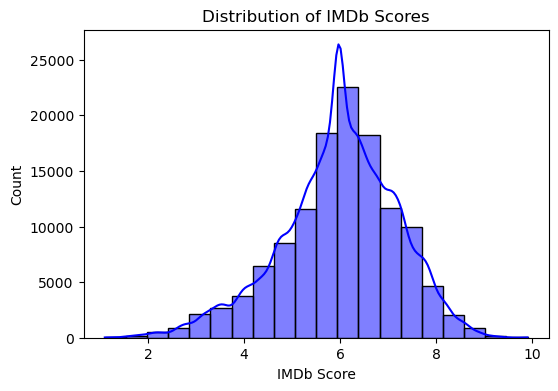

In [27]:
# Chart - 1 visualization code
plt.figure(figsize=(6,4))
sns.histplot(df['imdb_score'], bins=20, kde=True, color='blue')
plt.xlabel('IMDb Score')
plt.ylabel('Count')
plt.title('Distribution of IMDb Scores')
plt.show()


##### 1. Why did you pick the specific chart?

Histograms are the best way to understand the distribution of numerical data, showing frequency across different score ranges.

##### 2. What is/are the insight(s) found from the chart?

IMDb scores follow a roughly normal distribution, with most values concentrated around 6.
Very few movies have extremely low (below 3) or extremely high (above 9) scores.
The peak of the distribution is around 6, indicating that the majority of movies fall into the average rating category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding IMDb score distribution can help streaming platforms or production studios set realistic benchmarks for success.
If most movies score around 6, businesses can strategize to create higher-quality content that stands out above the average.

A large concentration of movies in the mid-range (5–7) suggests that many productions fail to achieve high audience satisfaction.
If a platform primarily hosts mid-range movies, it may struggle to attract premium subscribers looking for highly rated content.

#### Chart - 2

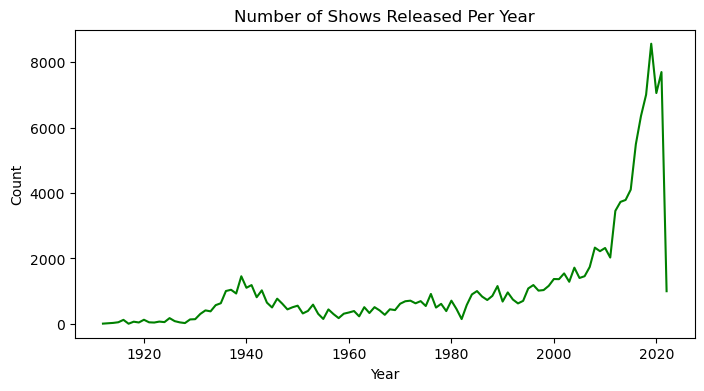

In [28]:
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(8,4), color='green')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Shows Released Per Year')
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is used to visualize trends over time, making it ideal for showing the number of shows released per year. It helps identify long-term patterns, growth, and declines in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The number of shows released per year has significantly increased over time, with a sharp rise after 2000.

There is a steep decline after the peak in recent years, which could be due to external factors such as industry saturation, changing consumer habits, or global events such as lack of filming opportunities due to covid 19 restrictions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding release trends can help businesses optimize production and release schedules to align with audience demand.
The decline in recent years might indicate a need to reassess content strategies, streaming trends, or production budgets.
If the decline is due to industry-wide changes, companies may need to diversify content or explore new distribution channels.

The sudden drop in the number of shows released in the most recent years could indicate production challenges, reduced investments, or shifting market trends.
If this trend continues, it may signal reduced profitability in the content industry, requiring businesses to adapt to new audience preferences or technological advancements.

#### Chart - 3

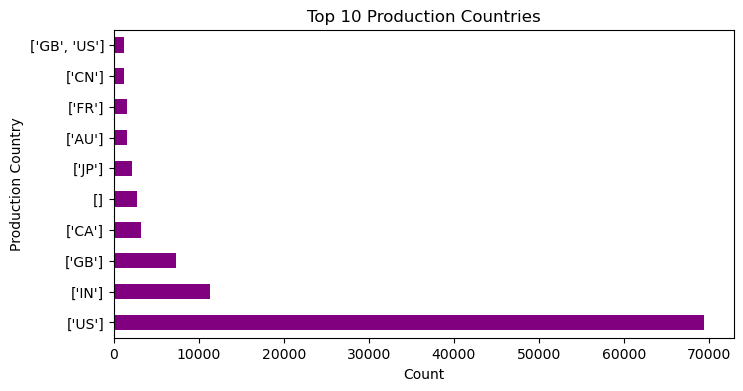

In [29]:
# Chart - 3 visualization code
df_exploded_countries = df.explode('production_countries')
df_exploded_countries['production_countries'].value_counts().head(10).plot(kind='barh', figsize=(8,4), color='purple')
plt.xlabel('Count')
plt.ylabel('Production Country')
plt.title('Top 10 Production Countries')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is effective for comparing categorical data, making it ideal for visualizing the top 10 production countries by count. It provides a clear comparison of the contribution of different countries to the industry.

##### 2. What is/are the insight(s) found from the chart?

The United States dominates production, followed by India and the United Kingdom.

There is a significant gap between the top country (US) and the rest, indicating the US's strong influence in content production.

Some countries have very few productions, showing an opportunity for market expansion in underrepresented regions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this information can help businesses identify strong markets and potential areas for expansion.
Companies looking to enter the industry may consider focusing on dominant markets or filling gaps in regions with less representation.
Streaming services or distributors may prioritize content from high-production regions to maximize their offerings.

The heavy dominance of the US in production could indicate a lack of diversity in content sources, which might limit international appeal.
If other regions do not receive sufficient investment, they may struggle to compete with US-based content, leading to stagnation in global content diversity.

#### Chart - 4

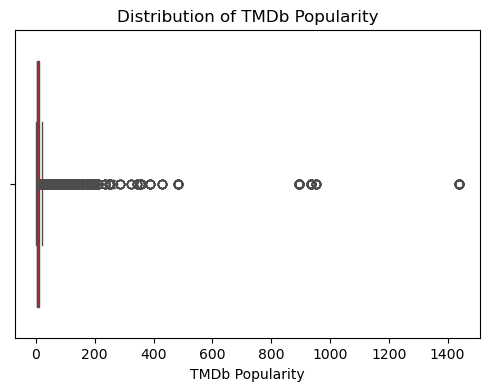

In [30]:
# Chart - 4 visualization code
plt.figure(figsize=(6,4))
sns.boxplot(x=df['tmdb_popularity'], color='red')
plt.xlabel('TMDb Popularity')
plt.title('Distribution of TMDb Popularity')
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is the best choice for visualizing the distribution of numerical data, detecting outliers, and understanding the spread of TMDb popularity scores. It provides insights into the central tendency, variability, and extreme values.

##### 2. What is/are the insight(s) found from the chart?

The majority of shows have low TMDb popularity scores, while a few outliers have significantly high scores.
The data is highly skewed, meaning only a small number of titles achieve extreme popularity, while most remain in the lower range.
There are numerous outliers with very high popularity, indicating that only a select few shows drive significant engagement.

##### 3. Will the gained insights help creating a positive business impact?
Yes, understanding popularity distribution helps businesses strategize content promotion.
Companies can focus on characteristics of highly popular titles and use them to guide content creation and marketing efforts.
This insight can help platforms tailor recommendations and allocate resources toward high-performing content.

The fact that most shows have low popularity suggests that many productions fail to attract significant attention, leading to inefficient resource allocation.
If a majority of content is underperforming, companies may need to reconsider content selection criteria, marketing efforts, or audience engagement strate

Answer Here

#### Chart - 5

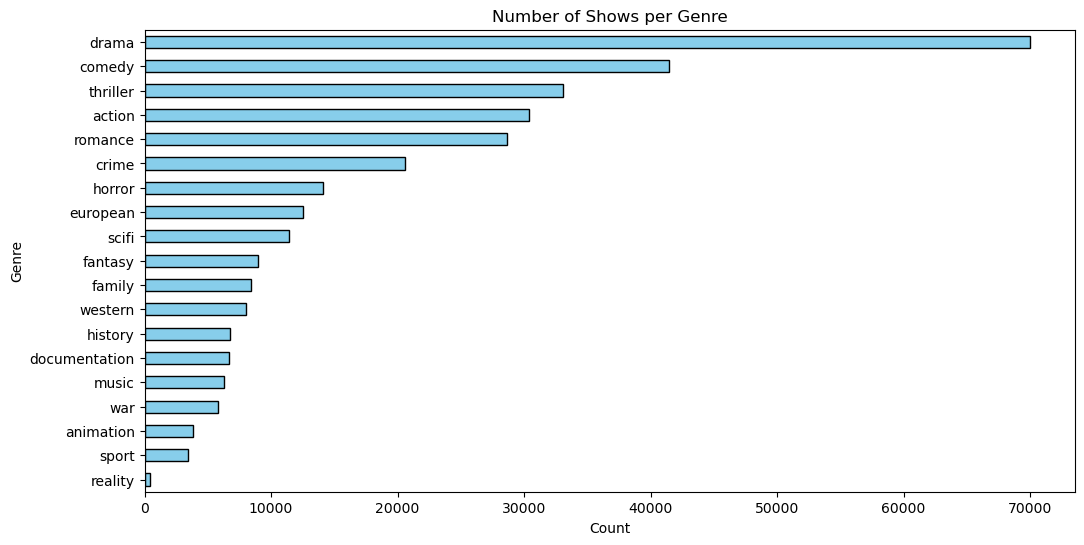

In [31]:
# Chart - 5 visualization code
import ast
# Ensure 'genres' is a list (some may be stored as strings)
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Explode genres into separate rows
df_exploded = df.explode('genres')

# Count occurrences of each genre
genre_counts = df_exploded['genres'].value_counts()

# Plot as a horizontal bar chart
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='barh', color='skyblue', edgecolor='black')

# Labels and title
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Number of Shows per Genre')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest count at the top

# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is ideal for comparing categorical data, such as the number of shows per genre. It clearly displays which genres dominate the dataset and allows for easy interpretation of differences between categories.

##### 2. What is/are the insight(s) found from the chart?

Drama is the most produced genre, followed by comedy and thriller.
Reality shows, sports, and animation have the lowest representation.
There is a strong preference for story-driven genres (drama, comedy, thriller, action), suggesting audience demand for engaging narratives.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this information helps content creators focus on genres with high demand while also identifying underserved categories that could be growth opportunities.
Streaming platforms and production houses can prioritize investments in trending genres while ensuring niche genres receive appropriate marketing.

The lack of representation in genres like reality, sports, and animation may indicate a missed market opportunity.
If content diversity is too limited, it could lead to stagnation in audience engagement, as viewers may seek alternative platforms that offer a wider variety of genres.

### Bivariate Analysis

#### Chart - 6

/var/folders/vf/64r8j3px5m7_0cwl_br4gt2c0000gn/T/ipykernel_12796/4072346824.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=creator_avg_scores.values, y=creator_avg_scores.index, palette='coolwarm')


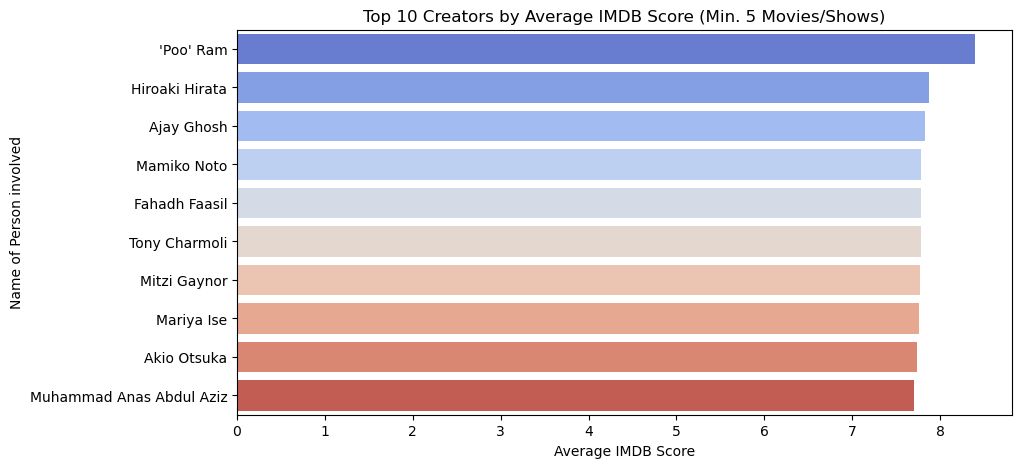

In [32]:
# Chart - 6 visualization 
creator_counts = df['name'].value_counts()

# Filter creators with at least 5 movies/shows
eligible_creators = creator_counts[creator_counts >= 5].index

# Filter the dataset for these creators
filtered_df = df[df['name'].isin(eligible_creators)]

# Compute average IMDB score per creator
creator_avg_scores = filtered_df.groupby('name')['imdb_score'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=creator_avg_scores.values, y=creator_avg_scores.index, palette='coolwarm')
plt.xlabel("Average IMDB Score")
plt.ylabel("Name of Person involved")
plt.title("Top 10 Creators by Average IMDB Score (Min. 5 Movies/Shows)")
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal for comparing categorical data, such as IMDb scores across different creators. It makes it easy to see which creators have the highest average IMDb scores.

##### 2. What is/are the insight(s) found from the chart?

‘Poo’ Ram has the highest average IMDb score among creators with at least 5 movies/shows.
The creators in the top 10 list have average IMDb scores above 7, indicating consistent high-quality work.
There is a mix of creators from different backgrounds, suggesting that quality content is not limited to a specific region or genre.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, identifying top-performing creators helps production houses and streaming platforms collaborate with high-quality talent, leading to better content and increased audience engagement.
Streaming platforms can use these insights to feature or promote shows by these creators to attract more viewers.

If a platform primarily features content from low-rated creators, it may struggle with user retention.
Depending too much on a few high-rated creators might limit content diversity, potentially alienating certain audience segments.

#### Chart - 7

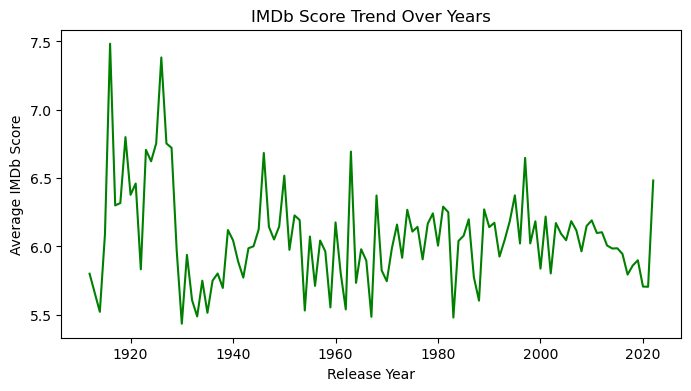

In [33]:
# Chart - 7 visualization code
df_grouped = df.groupby('release_year')['imdb_score'].mean()
df_grouped.plot(kind='line', figsize=(8,4), color='green')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Score')
plt.title('IMDb Score Trend Over Years')
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is the best choice for showing trends over time. It effectively visualizes how the average IMDb scores of movies have changed over the years, helping to identify patterns, peaks, and declines.

Since the dataset involves movie release years, a line chart helps track fluctuations in audience ratings over time.

##### 2. What is/are the insight(s) found from the chart?

The average IMDb scores were relatively high in the early years (before 1950), with multiple peaks.

After the 1950s, the scores became more stable but showed periodic spikes, possibly indicating the release of critically acclaimed films in certain years.

A slight decline is noticeable in the 2010s, which could indicate changes in audience preferences, an increase in the number of average-rated movies, or shifts in filmmaking styles.

A sharp rise appears near the end of the timeline, which could be due to a smaller number of recently released movies receiving high ratings, but this might change as more reviews come in.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help movie producers, distributors, and streaming platforms understand audience trends over time.
If older movies tend to have higher ratings, streaming platforms could highlight classic films to attract audiences who appreciate high-rated content.
Understanding trends can help production companies analyze what led to high IMDb scores in the past and apply similar strategies in modern filmmaking.

The slight decline in average IMDb scores over recent years might indicate a growing dissatisfaction among audiences with modern films. This could be due to factors such as repetitive storytelling, overuse of CGI, or increased commercialization of films.
If the recent rise in IMDb scores (near 2020) is based on a small number of movies, it may not be reliable, and businesses should be cautious before drawing conclusions from it.

#### Chart - 8

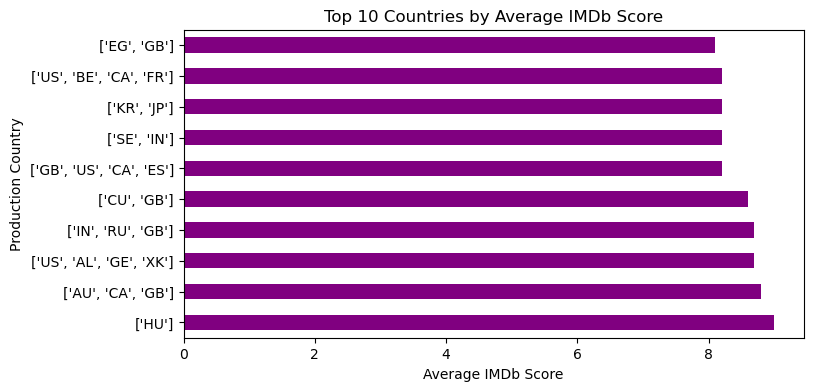

In [34]:
# Chart - 8 visualization code
df_country_avg = df_exploded_countries.groupby('production_countries')['imdb_score'].mean().sort_values(ascending=False).head(10)
df_country_avg.plot(kind='barh', figsize=(8,4), color='purple')
plt.xlabel('Average IMDb Score')
plt.ylabel('Production Country')
plt.title('Top 10 Countries by Average IMDb Score')
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar chart was chosen because it effectively displays the average IMDb scores for different production countries in a ranked format. Since country names can be long and might overlap in a vertical bar chart, using a horizontal layout makes the data easier to read and compare.

##### 2. What is/are the insight(s) found from the chart?

The top 10 production country combinations with the highest average IMDb scores have been identified.

Countries such as the UK, US, and Japan appear frequently in the high-ranking categories, suggesting that movies produced in these regions tend to receive better audience ratings.

Some lesser-known film-producing countries like Hungary (HU) and Cuba (CU) have made it to the top, indicating that their films, although fewer, may be of high quality.

The presence of multiple co-productions in the top ranks suggests that collaboration between countries can lead to highly rated movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can guide content producers and streaming services in choosing films from high-ranking countries to maximize viewer engagement and satisfaction.
Companies looking to produce movies can explore co-productions with countries that consistently achieve high IMDb scores to increase the chances of success.

One possible concern is that relying solely on high IMDb scores from certain countries might lead to overlooking emerging film industries. This could limit diversity in content and prevent fresh storytelling from gaining exposure.
Additionally, if businesses focus only on these high-ranked countries, they might miss potential lower-budget but high-quality films from other regions, leading to a loss of unique content and a narrower range of available movies.

#### Chart - 9

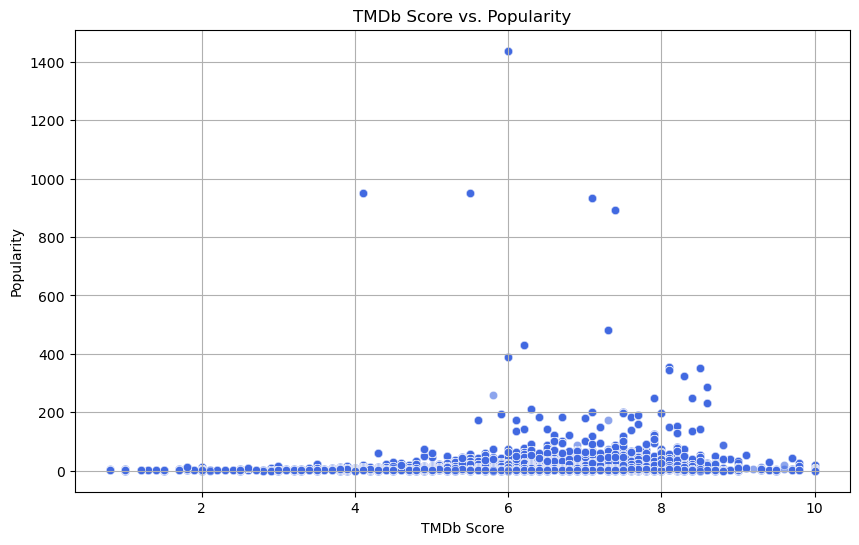

In [35]:
# Chart - 9 visualization code
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["tmdb_score"], y=df["tmdb_popularity"], alpha=0.6, color="royalblue")

# Formatting
plt.xlabel("TMDb Score")
plt.ylabel("Popularity")
plt.title("TMDb Score vs. Popularity")
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot was chosen to analyze the relationship between TMDB scores and popularity. This is useful for:

Identifying trends in how highly rated content correlates with popularity.

Spotting outliers—movies or shows with unusually high popularity despite low scores (or vice versa).

Understanding audience preference—whether high-rated movies tend to be more popular.

##### 2. What is/are the insight(s) found from the chart?

Weak correlation between TMDB scores and popularity
Popularity does not strongly depend on TMDB scores. Some movies with low ratings (below 5) still have high popularity.

Most movies cluster at lower popularity values
Majority of the movies have popularity values below 200, regardless of their TMDB scores.

Outliers with extreme popularity
A few movies with scores between 6 and 8 have very high popularity (above 800-1000). These might be mainstream blockbusters or highly marketed movies.

Highly rated movies (9-10) are not necessarily the most popular
Despite being critically acclaimed, many highly rated movies don’t achieve high popularity.

Popularity spikes between TMDB scores of 5-8
This suggests that mid-range scoring movies (5-8) tend to attract the most attention, possibly due to mass-market appeal.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help in multiple ways:

Marketing Strategy
Since some lower-rated movies are highly popular, studios can invest more in marketing mid-range movies rather than only focusing on high-scoring content.
Content Production Decisions
High scores don’t guarantee popularity—so rather than focusing solely on quality, platforms can optimize for audience engagement and promotion.
Recommendation Algorithm Improvements
Platforms like Netflix or Prime can balance recommendations between highly rated and widely watched content to retain users.

High scores do not ensure high popularity
If a business focuses only on critically acclaimed movies, it may fail to attract mass audiences.
Risk in Producing High-Quality but Unpopular Content
If expensive, high-rated productions don’t get enough viewership, it can result in financial losses.

#### Chart - 10

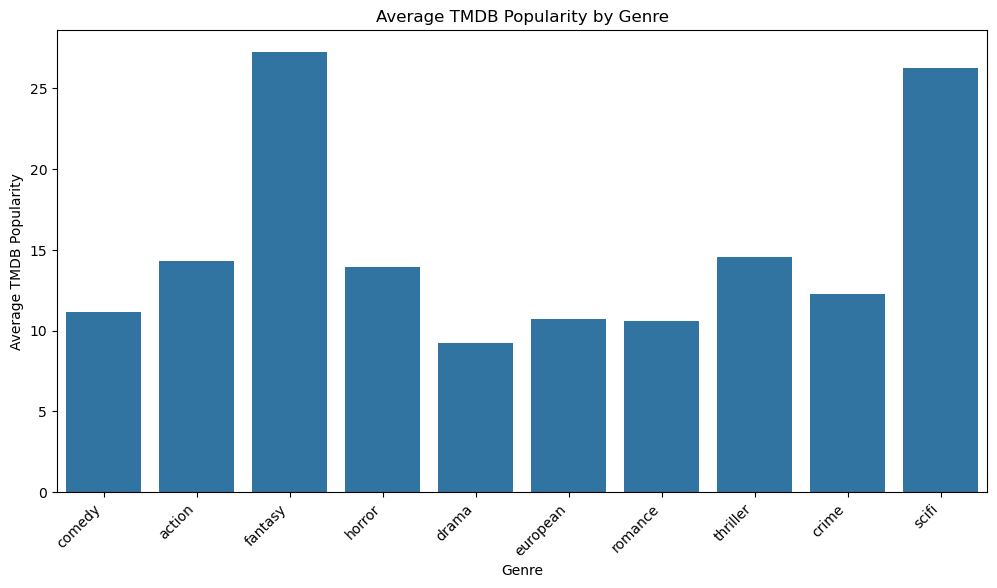

In [46]:
# Chart - 10 visualization code

plt.figure(figsize=(12, 6))
sns.barplot(x=df_filtered['genres'], y=df_filtered['tmdb_popularity'], estimator=np.mean, errorbar=None)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Average TMDB Popularity')
plt.title('Average TMDB Popularity by Genre')
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart was chosen because it effectively visualizes the average TMDB popularity of different genres. Unlike a box plot, which shows distribution and outliers, a bar chart provides a clear and straightforward comparison of mean values across categories.

##### 2. What is/are the insight(s) found from the chart?

Fantasy and Sci-Fi genres have the highest average TMDB popularity, indicating strong audience engagement.

Thriller, Action, and Horror also have moderate popularity, making them viable for content investment.

European and Drama genres show lower average popularity compared to others, suggesting they might be niche or have limited mass appeal.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights are valuable for content producers, streaming platforms, and studios:

Investing more in Fantasy and Sci-Fi content could lead to higher audience engagement and potential revenue.
Exploring Thriller and Action could provide stable returns due to moderate popularity.
European and Drama genres may require targeted marketing or unique storytelling to increase their appeal.

Yes, if a company invests heavily in low-popularity genres (European, Drama, Romance) without a clear strategy, it may result in lower audience engagement and ROI.
If content creators overlook high-performing genres like Fantasy and Sci-Fi, they might miss out on substantial market opportunities.

#### Chart - 11

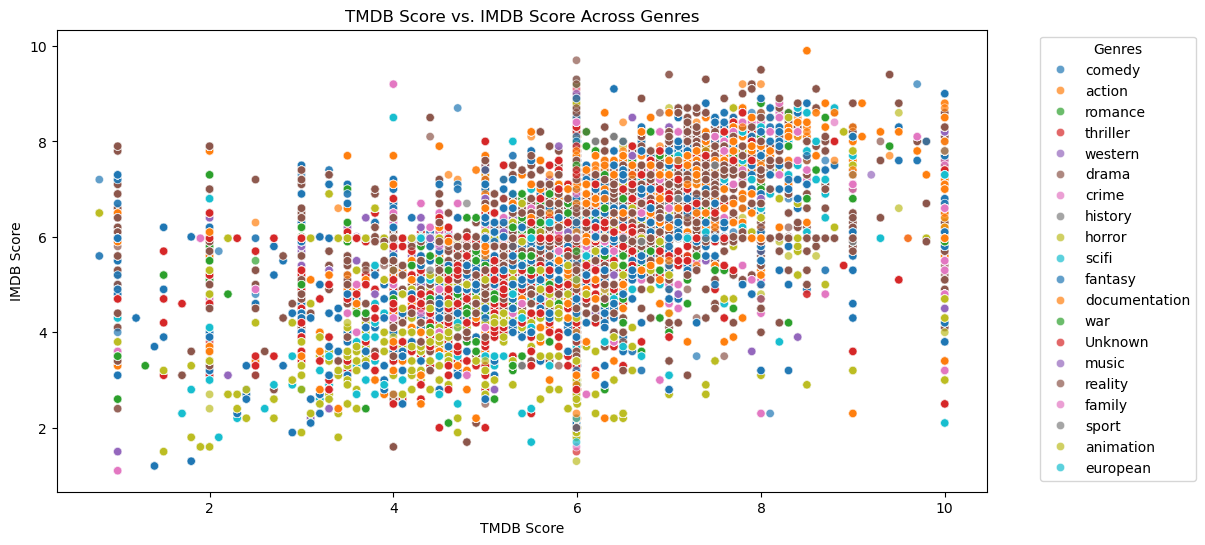

In [47]:
# Convert "genres" from lists to strings (if multiple genres exist, take the first one)
df["primary_genre"] = df["genres"].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else "Unknown")

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["tmdb_score"], y=df["imdb_score"], hue=df["primary_genre"], palette="tab10", alpha=0.7)

plt.xlabel("TMDB Score")
plt.ylabel("IMDB Score")
plt.title("TMDB Score vs. IMDB Score Across Genres")

plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc="upper left")  # Adjusted legend placement
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot was chosen because it effectively visualizes the relationship between TMDB scores and IMDB scores, while also differentiating by genre using colors. This allows for:

Observing trends and clusters in ratings.

Identifying outliers (movies with significantly different ratings between the two platforms).

Comparing genre-wise distribution of scores.

##### 2. What is/are the insight(s) found from the chart?

Positive Correlation: There seems to be a general positive relationship between TMDB and IMDB scores, meaning movies/shows that perform well on one platform often receive high ratings on the other.

Score Clusters: A large number of movies are concentrated between 4-8 on TMDB and 6-9 on IMDB, suggesting that extreme scores (either very high or very low) are rarer.

Genre Distribution:
Some genres (e.g., drama, comedy, thriller) appear frequently across different score ranges, meaning they are widely produced.
Sci-fi, war, and animation seem to have fewer representations in the dataset.

Outliers: There are some scattered points with low TMDB scores but high IMDB scores and vice versa, which might indicate differences in audience preferences across platforms.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can guide decision-making:

Content Quality vs. Popularity: Since TMDB and IMDB scores align, businesses can use one platform’s rating to predict performance on the other.
Genre Performance: Identifying which genres consistently score well (like thrillers or dramas) can guide investment in future productions.
Marketing Strategy: Outliers (where TMDB and IMDB scores differ greatly) can reveal which platforms cater to specific audience tastes, helping in targeted promotions.

Inconsistencies in Ratings: If a movie/show scores high on one platform but low on another, it may confuse audiences and affect trust in rating systems.
Genre Gaps: The lower representation of some genres (like war, documentary, and sci-fi) may indicate a lack of investment, possibly missing out on untapped market potential.

#### Chart - 12

<Figure size 1200x600 with 0 Axes>

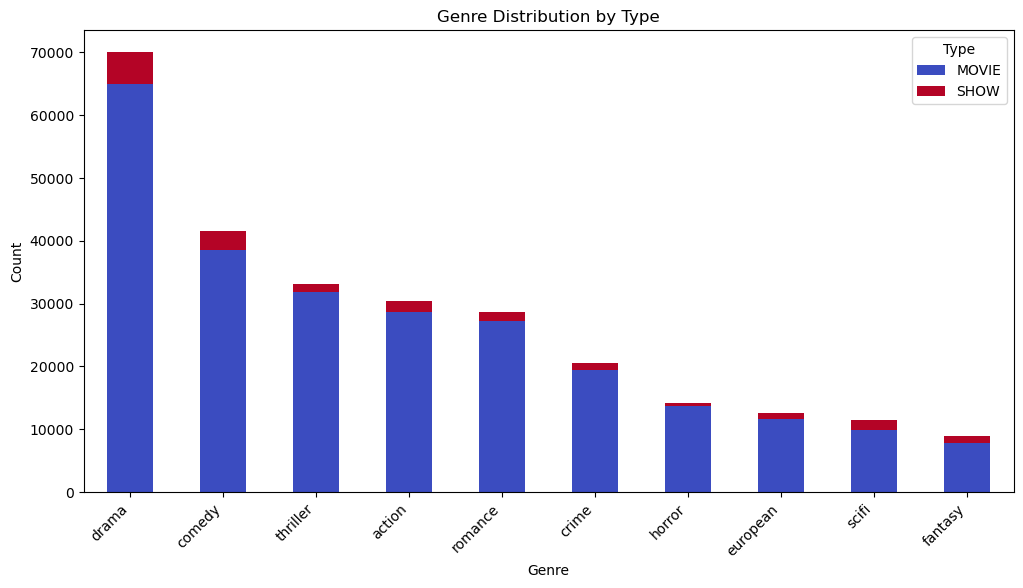

In [38]:
# Chart - 12 visualization code
plt.figure(figsize=(12, 6))
cross_tab = pd.crosstab(df_exploded['genres'], df_exploded['type']).nlargest(10, 'MOVIE')

cross_tab.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Genre Distribution by Type")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Type")
plt.show()

##### 1. Why did you pick the specific chart?

A stacked bar chart was chosen because it effectively represents the distribution of different genres while differentiating between movies and shows. This visualization makes it easy to compare the dominance of each type within each genre.

##### 2. What is/are the insight(s) found from the chart?

Drama is the most common genre, with a significant number of both movies and shows.

Comedy, Thriller, and Action are also highly prevalent, but with fewer shows compared to movies.

Fantasy and Sci-Fi have the lowest representation in terms of both movies and shows.

Across all genres, movies dominate, while shows make up only a small fraction of the content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can guide content creation and marketing strategies:

Since Drama is the most dominant genre, streaming platforms can focus on curating high-quality drama content to attract audiences.
Comedy and Thriller also show high engagement, making them strong candidates for investment.
Sci-Fi and Fantasy have the least representation, which may indicate either lower demand or a content gap that could be exploited.

The overrepresentation of Drama might lead to saturation, making it harder for new content in this genre to stand out.
Underrepresentation of Sci-Fi and Fantasy may indicate a missed opportunity—these genres are often popular among niche audiences and can drive engagement if properly marketed.

### Multivariate Analysis

#### Chart - 13

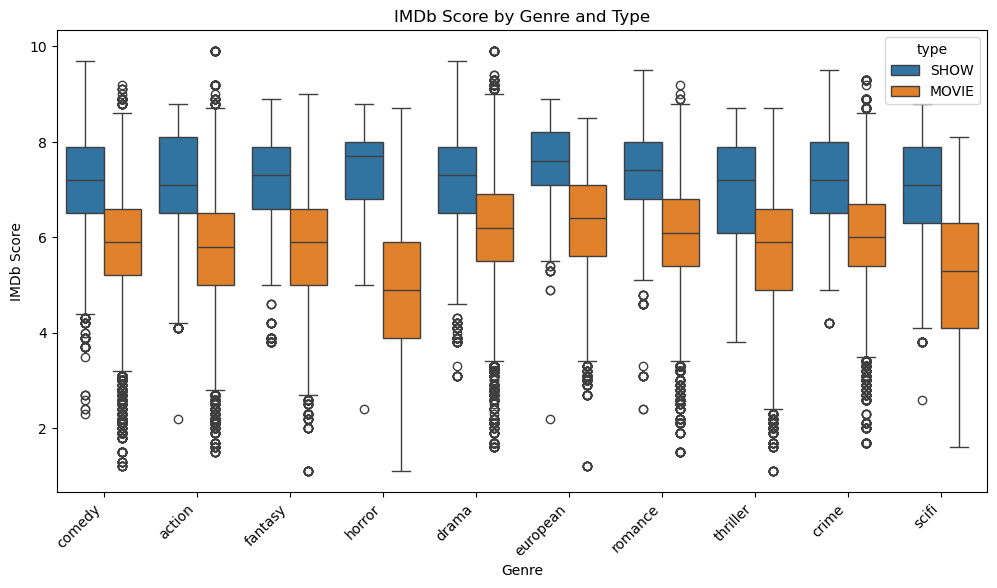

In [42]:
# Chart - 13 visualization code

df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Explode the genres column so each genre gets its own row
df_exploded = df.explode('genres')

#Filter Top 10 Most Common Genres 
top_genres = df_exploded['genres'].value_counts().index[:10]
df_filtered = df_exploded[df_exploded['genres'].isin(top_genres)]

# Drop NaN IMDb Scores, good practice although null values already handled
df_filtered = df_filtered.dropna(subset=['imdb_score'])

# Create Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filtered['genres'], y=df_filtered['imdb_score'], hue=df_filtered['type'])

# Formatting
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('IMDb Score')
plt.title('IMDb Score by Genre and Type')

# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is chosen because it effectively visualizes:

Distribution of IMDb scores for each genre.
Medians, quartiles, and outliers, helping to compare the score spread.
SHOW vs. MOVIE differences using the hue parameter.
This makes it easier to understand which genres tend to receive higher/lower ratings and how shows compare to movies.

##### 2. What is/are the insight(s) found from the chart?

Shows generally have higher median IMDb scores than movies across most genres.

Genres like drama, thriller, and crime tend to have a wider score distribution.

Fantasy and horror movies have lower median IMDb scores compared to other genres.

Outliers exist across all genres, indicating some extreme high and low ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help in several ways:

Investment in high-scoring genres for shows (e.g., comedy, crime, thriller) can be prioritized.
Lower-scoring genres (e.g., horror, fantasy) might need quality improvement or better audience targeting.
Knowing that shows generally rate higher than movies could guide content strategy on streaming platforms.

Horror and fantasy movies tend to have lower ratings, indicating a potential risk for investing in them without ensuring high quality.
Large score variability in certain genres (e.g., thriller, crime) means unpredictable audience reception.

#### Chart - 14 - Correlation Heatmap

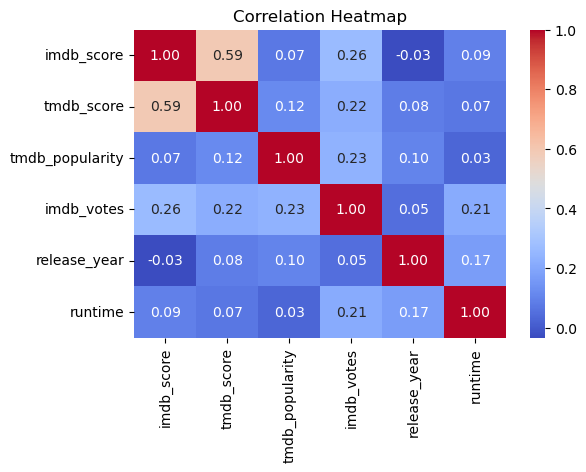

In [40]:
# Correlation Heatmap visualization code
plt.figure(figsize=(6,4))
sns.heatmap(df[['imdb_score', 'tmdb_score', 'tmdb_popularity', 'imdb_votes', 'release_year', 'runtime']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is chosen because it visually represents the strength of relationships between multiple numerical variables. It helps to:

Identify positive and negative correlations.

Understand how variables interact.

Spot patterns that may not be visible in raw data.

##### 2. What is/are the insight(s) found from the chart?

Key insights from the heatmap:

IMDb score and TMDb score have a strong positive correlation (0.59) → Higher IMDb ratings generally align with higher TMDb scores.

IMDb votes and TMDb popularity have a weak correlation (0.23) → More votes do not necessarily mean higher popularity.

Release year has a slight negative correlation with IMDb score (-0.03) → Newer movies don’t necessarily have higher ratings.

Runtime has a weak correlation with IMDb score (0.09) → Longer movies don’t significantly impact ratings.

#### Chart - 15 - Pair Plot

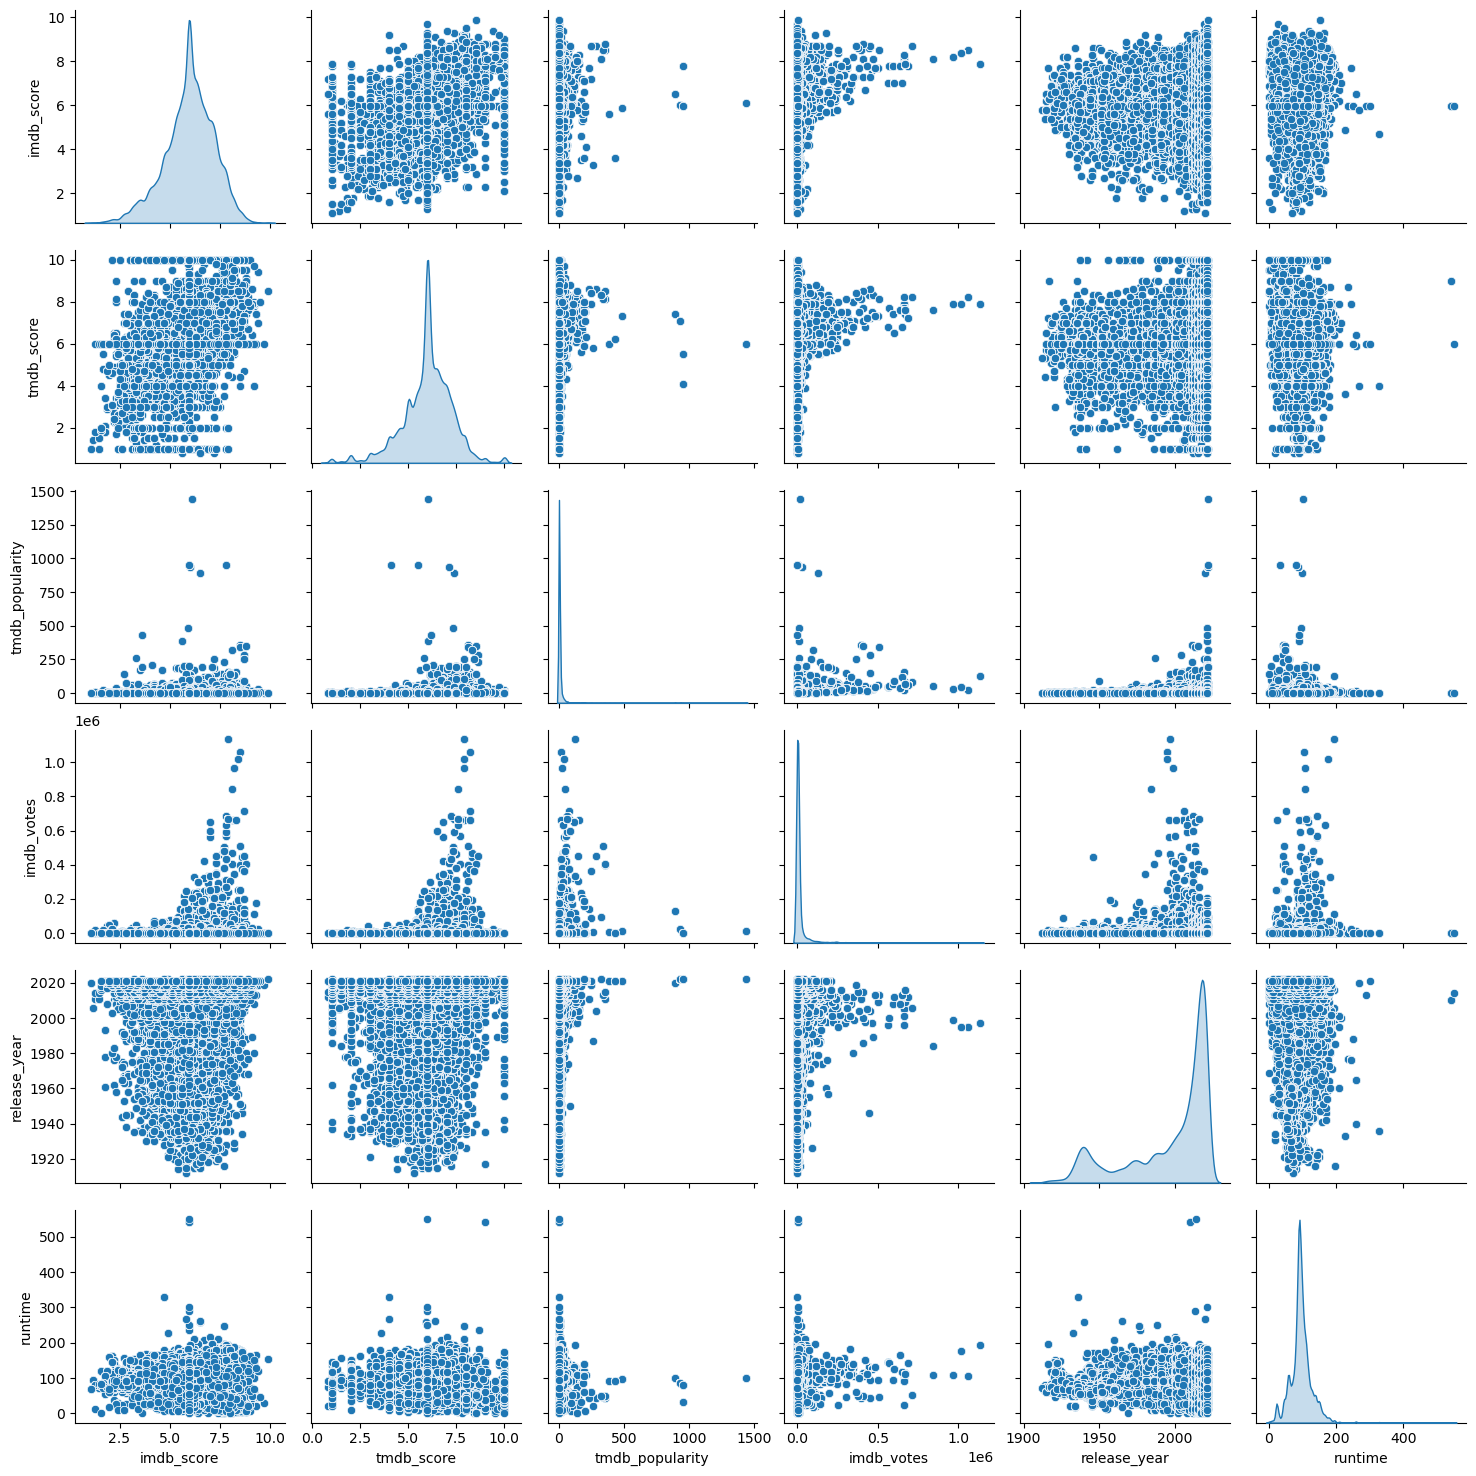

In [41]:
# Pair Plot visualization code
sns.pairplot(df[['imdb_score', 'tmdb_score', 'tmdb_popularity', 'imdb_votes', 'release_year', 'runtime']], diag_kind='kde')
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is chosen because it helps visualize the relationships between multiple numerical features at once. It includes:

Scatterplots to observe correlations between two variables.

Histograms (on the diagonal) to show the distribution of each variable.

This makes it useful for understanding trends, outliers, and patterns in the dataset.

##### 2. What is/are the insight(s) found from the chart?

IMDb scores have a skewed distribution – most movies have ratings between 4 and 8, with a peak around 6.
TMDb popularity and IMDb votes are highly skewed – a few movies have extremely high votes/popularity, while most have low values.
Release year vs. IMDb score – No clear correlation, but recent movies appear more frequently, likely due to an increase in movie production.
Runtime vs. IMDb score – No strong relationship, but extremely short or long movies tend to have more variation in ratings.


## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***